In [1]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

import numpy as np
import lightgbm as lgb

In [2]:
X_train = np.load('XGB/X_train.npy')
X_test = np.load('XGB/X_test.npy')

y_train = np.load('XGB/y_train.npy')
y_test = np.load('XGB/y_test.npy')

# y_sequences_train = np.load('XGB/y_sequences_train.npy')
# y_sequences_test = np.load('XGB/y_sequences_test.npy')

# y_cluster_train = np.load('XGB/y_cluster_train.npy')
# y_cluster_test = np.load('XGB/y_cluster_test.npy')

# y_cluster_train[y_cluster_train > 0] = 1
# y_cluster_test[y_cluster_test > 0] = 1

In [51]:
from sklearn.metrics import mean_squared_error

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

gbm = lgb.LGBMRegressor(**hyper_params)#, device_type='gpu')

gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=100,
        )

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.958998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] fe

[73]	valid_0's l1: 1.70996	valid_0's l2: 4.70046
[74]	valid_0's l1: 1.70919	valid_0's l2: 4.69698
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	valid_0's l1: 1.70842	valid_0's l2: 4.69328
[76]	valid_0's l1: 1.70772	valid_0's l2: 4.68999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[77]	valid_0's l1: 1.70688	valid_0's l2: 4.68624
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[78]	valid_0's l1: 1.70614	valid_0's l2: 4.68299
[79]	valid_0's l1: 1.70553	valid_0's l2: 4.68013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's l1: 1.70479	valid_0's l2: 4.67662
[81]	valid_0's l1: 1.70388	valid_0's l2: 4.67247
[82]	valid_0's l1: 1.70313	valid_0's l2: 4.66904
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[83]	valid_0's l1: 1.70224	valid_0's l2: 4.66492
[84]	valid_0's l1: 1.70148	valid_0's l2: 4.66141
[85]	valid_0's l1: 1.70063	valid_0's 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[155]	valid_0's l1: 1.65029	valid_0's l2: 4.45119
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[156]	valid_0's l1: 1.64975	valid_0's l2: 4.44909
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[157]	valid_0's l1: 1.64921	valid_0's l2: 4.44729
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[158]	valid_0's l1: 1.64875	valid_0's l2: 4.44554
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[159]	valid_0's l1: 1.64822	valid_0's l2: 4.44361
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[160]	valid_0's l1: 1.64772	valid_0's l2: 4.44181
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[161]	valid_0's l1: 1.64719	valid_0's l2: 4.43996
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[162]	valid_0's l1: 1.64663	valid_0's l2: 4.43778


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[225]	valid_0's l1: 1.61658	valid_0's l2: 4.32823
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[226]	valid_0's l1: 1.61613	valid_0's l2: 4.32654
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[227]	valid_0's l1: 1.6158	valid_0's l2: 4.32542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[228]	valid_0's l1: 1.61535	valid_0's l2: 4.3236
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[229]	valid_0's l1: 1.61481	valid_0's l2: 4.3217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[230]	valid_0's l1: 1.61444	valid_0's l2: 4.32039
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[231]	valid_0's l1: 1.6141	valid_0's l2: 4.31919
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[232]	valid_0's l1: 1.61377	valid_0's l2: 4.31791
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[292]	valid_0's l1: 1.59579	valid_0's l2: 4.25086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[293]	valid_0's l1: 1.59548	valid_0's l2: 4.24962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[294]	valid_0's l1: 1.59522	valid_0's l2: 4.24852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[295]	valid_0's l1: 1.59499	valid_0's l2: 4.24756
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[296]	valid_0's l1: 1.59486	valid_0's l2: 4.24704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[297]	valid_0's l1: 1.59457	valid_0's l2: 4.2458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[298]	valid_0's l1: 1.5943	valid_0's l2: 4.24471
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[299]	valid_0's l1: 1.59407	valid_0's l2: 4.2438
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[359]	valid_0's l1: 1.58219	valid_0's l2: 4.19773
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[360]	valid_0's l1: 1.582	valid_0's l2: 4.19707
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[361]	valid_0's l1: 1.58175	valid_0's l2: 4.1962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[362]	valid_0's l1: 1.58158	valid_0's l2: 4.19569
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[363]	valid_0's l1: 1.5815	valid_0's l2: 4.19547
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[364]	valid_0's l1: 1.58128	valid_0's l2: 4.19486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[365]	valid_0's l1: 1.5811	valid_0's l2: 4.19419
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[366]	valid_0's l1: 1.58099	valid_0's l2: 4.19379
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[430]	valid_0's l1: 1.57217	valid_0's l2: 4.1622
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[431]	valid_0's l1: 1.57206	valid_0's l2: 4.16188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[432]	valid_0's l1: 1.572	valid_0's l2: 4.16156
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[433]	valid_0's l1: 1.57189	valid_0's l2: 4.16105
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[434]	valid_0's l1: 1.57176	valid_0's l2: 4.16065
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[435]	valid_0's l1: 1.57174	valid_0's l2: 4.16054
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[436]	valid_0's l1: 1.57167	valid_0's l2: 4.16034
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[437]	valid_0's l1: 1.57156	valid_0's l2: 4.15987
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[497]	valid_0's l1: 1.56467	valid_0's l2: 4.13556
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[498]	valid_0's l1: 1.56461	valid_0's l2: 4.13535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[499]	valid_0's l1: 1.56457	valid_0's l2: 4.1352
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[500]	valid_0's l1: 1.56449	valid_0's l2: 4.13486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[501]	valid_0's l1: 1.56437	valid_0's l2: 4.1345
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[502]	valid_0's l1: 1.56432	valid_0's l2: 4.13445
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[503]	valid_0's l1: 1.56428	valid_0's l2: 4.13439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[504]	valid_0's l1: 1.56419	valid_0's l2: 4.13408
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[563]	valid_0's l1: 1.56037	valid_0's l2: 4.12178
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[564]	valid_0's l1: 1.56028	valid_0's l2: 4.12152
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[565]	valid_0's l1: 1.56018	valid_0's l2: 4.12109
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[566]	valid_0's l1: 1.56006	valid_0's l2: 4.12062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[567]	valid_0's l1: 1.55997	valid_0's l2: 4.12024
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[568]	valid_0's l1: 1.55984	valid_0's l2: 4.11975
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[569]	valid_0's l1: 1.5597	valid_0's l2: 4.11931
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[570]	valid_0's l1: 1.55964	valid_0's l2: 4.11892
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[630]	valid_0's l1: 1.55669	valid_0's l2: 4.10804
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[631]	valid_0's l1: 1.55666	valid_0's l2: 4.10795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[632]	valid_0's l1: 1.55662	valid_0's l2: 4.10787
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[633]	valid_0's l1: 1.5566	valid_0's l2: 4.10786
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[634]	valid_0's l1: 1.55655	valid_0's l2: 4.10766
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[635]	valid_0's l1: 1.55651	valid_0's l2: 4.10755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[636]	valid_0's l1: 1.55643	valid_0's l2: 4.10719
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[637]	valid_0's l1: 1.55639	valid_0's l2: 4.10694
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[697]	valid_0's l1: 1.55298	valid_0's l2: 4.09466
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[698]	valid_0's l1: 1.55299	valid_0's l2: 4.0947
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[699]	valid_0's l1: 1.55289	valid_0's l2: 4.09426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[700]	valid_0's l1: 1.5529	valid_0's l2: 4.09438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[701]	valid_0's l1: 1.55289	valid_0's l2: 4.09439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[702]	valid_0's l1: 1.55285	valid_0's l2: 4.09422
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[703]	valid_0's l1: 1.55285	valid_0's l2: 4.09416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[704]	valid_0's l1: 1.55277	valid_0's l2: 4.094
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[763]	valid_0's l1: 1.5503	valid_0's l2: 4.08498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[764]	valid_0's l1: 1.55025	valid_0's l2: 4.08456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[765]	valid_0's l1: 1.55022	valid_0's l2: 4.08442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[766]	valid_0's l1: 1.55021	valid_0's l2: 4.08438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[767]	valid_0's l1: 1.55018	valid_0's l2: 4.08423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[768]	valid_0's l1: 1.55021	valid_0's l2: 4.08426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[769]	valid_0's l1: 1.55023	valid_0's l2: 4.08429
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[770]	valid_0's l1: 1.55022	valid_0's l2: 4.08413
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[829]	valid_0's l1: 1.54877	valid_0's l2: 4.07887
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[830]	valid_0's l1: 1.54875	valid_0's l2: 4.07891
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[831]	valid_0's l1: 1.54877	valid_0's l2: 4.07907
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[832]	valid_0's l1: 1.54879	valid_0's l2: 4.07927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[833]	valid_0's l1: 1.5488	valid_0's l2: 4.07941
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[834]	valid_0's l1: 1.54881	valid_0's l2: 4.0795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[835]	valid_0's l1: 1.54885	valid_0's l2: 4.07965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[836]	valid_0's l1: 1.54885	valid_0's l2: 4.07969
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[895]	valid_0's l1: 1.54799	valid_0's l2: 4.078
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[896]	valid_0's l1: 1.548	valid_0's l2: 4.07806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[897]	valid_0's l1: 1.54798	valid_0's l2: 4.07803
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[898]	valid_0's l1: 1.54799	valid_0's l2: 4.07807
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[899]	valid_0's l1: 1.54799	valid_0's l2: 4.07809
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[900]	valid_0's l1: 1.54795	valid_0's l2: 4.07791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[901]	valid_0's l1: 1.54793	valid_0's l2: 4.07782
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[902]	valid_0's l1: 1.54787	valid_0's l2: 4.07753
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[961]	valid_0's l1: 1.54545	valid_0's l2: 4.06932
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[962]	valid_0's l1: 1.54541	valid_0's l2: 4.06914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[963]	valid_0's l1: 1.54541	valid_0's l2: 4.06919
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[964]	valid_0's l1: 1.54537	valid_0's l2: 4.06908
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[965]	valid_0's l1: 1.54539	valid_0's l2: 4.06924
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[966]	valid_0's l1: 1.54534	valid_0's l2: 4.06913
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[967]	valid_0's l1: 1.54534	valid_0's l2: 4.06918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[968]	valid_0's l1: 1.54529	valid_0's l2: 4.0691
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1027]	valid_0's l1: 1.54423	valid_0's l2: 4.06518
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1028]	valid_0's l1: 1.54423	valid_0's l2: 4.06522
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1029]	valid_0's l1: 1.54417	valid_0's l2: 4.06492
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1030]	valid_0's l1: 1.54417	valid_0's l2: 4.06491
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1031]	valid_0's l1: 1.54415	valid_0's l2: 4.06456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1032]	valid_0's l1: 1.5441	valid_0's l2: 4.06446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1033]	valid_0's l1: 1.54408	valid_0's l2: 4.06429
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1034]	valid_0's l1: 1.54408	valid_0's l2: 4

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1093]	valid_0's l1: 1.54315	valid_0's l2: 4.06234
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1094]	valid_0's l1: 1.54312	valid_0's l2: 4.06224
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1095]	valid_0's l1: 1.5431	valid_0's l2: 4.06218
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1096]	valid_0's l1: 1.54309	valid_0's l2: 4.06215
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1097]	valid_0's l1: 1.54309	valid_0's l2: 4.06217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1098]	valid_0's l1: 1.54309	valid_0's l2: 4.0622
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1099]	valid_0's l1: 1.54305	valid_0's l2: 4.06207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1100]	valid_0's l1: 1.543	valid_0's l2: 4.06

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1159]	valid_0's l1: 1.54244	valid_0's l2: 4.06067
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1160]	valid_0's l1: 1.54244	valid_0's l2: 4.06063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1161]	valid_0's l1: 1.54247	valid_0's l2: 4.06062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1162]	valid_0's l1: 1.54246	valid_0's l2: 4.06054
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1163]	valid_0's l1: 1.54249	valid_0's l2: 4.06062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1164]	valid_0's l1: 1.54248	valid_0's l2: 4.06057
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1165]	valid_0's l1: 1.54251	valid_0's l2: 4.06066
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1166]	valid_0's l1: 1.54248	valid_0's l2: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1226]	valid_0's l1: 1.54197	valid_0's l2: 4.05828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1227]	valid_0's l1: 1.542	valid_0's l2: 4.05835
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1228]	valid_0's l1: 1.542	valid_0's l2: 4.05834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1229]	valid_0's l1: 1.54202	valid_0's l2: 4.05836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1230]	valid_0's l1: 1.54198	valid_0's l2: 4.05819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1231]	valid_0's l1: 1.542	valid_0's l2: 4.05825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1232]	valid_0's l1: 1.54199	valid_0's l2: 4.05821
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1233]	valid_0's l1: 1.54199	valid_0's l2: 4.0583

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1293]	valid_0's l1: 1.54155	valid_0's l2: 4.05625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1294]	valid_0's l1: 1.54151	valid_0's l2: 4.05621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1295]	valid_0's l1: 1.5415	valid_0's l2: 4.05618
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1296]	valid_0's l1: 1.54147	valid_0's l2: 4.05592
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1297]	valid_0's l1: 1.54141	valid_0's l2: 4.05571
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1298]	valid_0's l1: 1.54138	valid_0's l2: 4.05564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1299]	valid_0's l1: 1.54133	valid_0's l2: 4.05542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1300]	valid_0's l1: 1.5413	valid_0's l2: 4.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1360]	valid_0's l1: 1.54004	valid_0's l2: 4.05193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1361]	valid_0's l1: 1.54004	valid_0's l2: 4.05203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1362]	valid_0's l1: 1.54003	valid_0's l2: 4.052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1363]	valid_0's l1: 1.54003	valid_0's l2: 4.05205
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1364]	valid_0's l1: 1.54001	valid_0's l2: 4.05206
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1365]	valid_0's l1: 1.53998	valid_0's l2: 4.05197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1366]	valid_0's l1: 1.53997	valid_0's l2: 4.05186
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1367]	valid_0's l1: 1.53997	valid_0's l2: 4.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1428]	valid_0's l1: 1.53918	valid_0's l2: 4.04951
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1429]	valid_0's l1: 1.5392	valid_0's l2: 4.04953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1430]	valid_0's l1: 1.53919	valid_0's l2: 4.0495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1431]	valid_0's l1: 1.53921	valid_0's l2: 4.04966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1432]	valid_0's l1: 1.5392	valid_0's l2: 4.0497
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1433]	valid_0's l1: 1.5392	valid_0's l2: 4.04983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1434]	valid_0's l1: 1.5392	valid_0's l2: 4.04978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1435]	valid_0's l1: 1.53921	valid_0's l2: 4.0498

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1495]	valid_0's l1: 1.53894	valid_0's l2: 4.04892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1496]	valid_0's l1: 1.53895	valid_0's l2: 4.0489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1497]	valid_0's l1: 1.53896	valid_0's l2: 4.04893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1498]	valid_0's l1: 1.53896	valid_0's l2: 4.0489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1499]	valid_0's l1: 1.53896	valid_0's l2: 4.04891
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1500]	valid_0's l1: 1.53897	valid_0's l2: 4.04892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1501]	valid_0's l1: 1.53896	valid_0's l2: 4.04895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1502]	valid_0's l1: 1.53896	valid_0's l2: 4.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1561]	valid_0's l1: 1.53817	valid_0's l2: 4.04757
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1562]	valid_0's l1: 1.53814	valid_0's l2: 4.04756
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1563]	valid_0's l1: 1.53809	valid_0's l2: 4.04753
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1564]	valid_0's l1: 1.53809	valid_0's l2: 4.04759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1565]	valid_0's l1: 1.53804	valid_0's l2: 4.04746
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1566]	valid_0's l1: 1.53799	valid_0's l2: 4.04734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1567]	valid_0's l1: 1.53794	valid_0's l2: 4.04721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1568]	valid_0's l1: 1.53792	valid_0's l2: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1627]	valid_0's l1: 1.53746	valid_0's l2: 4.04662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1628]	valid_0's l1: 1.53747	valid_0's l2: 4.04654
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1629]	valid_0's l1: 1.53743	valid_0's l2: 4.04645
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1630]	valid_0's l1: 1.53743	valid_0's l2: 4.04643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1631]	valid_0's l1: 1.53744	valid_0's l2: 4.04655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1632]	valid_0's l1: 1.53747	valid_0's l2: 4.04662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1633]	valid_0's l1: 1.53749	valid_0's l2: 4.04664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1634]	valid_0's l1: 1.53749	valid_0's l2: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1695]	valid_0's l1: 1.53763	valid_0's l2: 4.04689
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1696]	valid_0's l1: 1.5376	valid_0's l2: 4.0468
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1697]	valid_0's l1: 1.53758	valid_0's l2: 4.04682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1698]	valid_0's l1: 1.53756	valid_0's l2: 4.04687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1699]	valid_0's l1: 1.53755	valid_0's l2: 4.04689
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1700]	valid_0's l1: 1.53754	valid_0's l2: 4.04681
Early stopping, best iteration is:
[1600]	valid_0's l1: 1.53766	valid_0's l2: 4.04643


LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8, metric=['l2'],
              n_estimators=1000, num_iterations=100000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [57]:
confusion_matrix(gbm.predict(X_test) > 3, y_test > 3)

array([[4150,  909],
       [ 598,  583]])

In [3]:
from sklearn.metrics import roc_auc_score

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'is_unbalance': True,
    'metric': ['f1'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

gbm = lgb.LGBMClassifier(**hyper_params)

gbm.fit(X_train, y_train > 3,
        eval_set=[(X_test, y_test > 3)],
        eval_metric='auc',
        early_stopping_rounds=100)

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.411373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] fe

[137]	valid_0's auc: 0.71816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[138]	valid_0's auc: 0.718225
[139]	valid_0's auc: 0.718269
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[140]	valid_0's auc: 0.718238
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[141]	valid_0's auc: 0.7183
[142]	valid_0's auc: 0.718342
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[143]	valid_0's auc: 0.718232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[144]	valid_0's auc: 0.718287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[145]	valid_0's auc: 0.71842
[146]	valid_0's auc: 0.718348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[147]	valid_0's auc: 0.718495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[148]	valid_0's auc: 0.718426
[149]	valid_0's auc: 0.71841
[LightGBM] [War

[259]	valid_0's auc: 0.721589
[260]	valid_0's auc: 0.721488
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[261]	valid_0's auc: 0.721551
[262]	valid_0's auc: 0.721448
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[263]	valid_0's auc: 0.721555
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[264]	valid_0's auc: 0.721541
[265]	valid_0's auc: 0.721616
[266]	valid_0's auc: 0.721565
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[267]	valid_0's auc: 0.721566
[268]	valid_0's auc: 0.721657
[269]	valid_0's auc: 0.721688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[270]	valid_0's auc: 0.721687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[271]	valid_0's auc: 0.721781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[272]	valid_0's auc: 0.721749
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[366]	valid_0's auc: 0.723466
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[367]	valid_0's auc: 0.723456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[368]	valid_0's auc: 0.72351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[369]	valid_0's auc: 0.723434
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[370]	valid_0's auc: 0.723408
[371]	valid_0's auc: 0.723401
[372]	valid_0's auc: 0.723367
[373]	valid_0's auc: 0.723347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[374]	valid_0's auc: 0.72333
[375]	valid_0's auc: 0.723326
[376]	valid_0's auc: 0.723298
[377]	valid_0's auc: 0.723198
[378]	valid_0's auc: 0.723152
[379]	valid_0's auc: 0.723113
[380]	valid_0's auc: 0.7231
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[381]	valid_0's auc: 0.72314


LGBMClassifier(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
               is_unbalance=True, learning_rate=0.005, max_bin=512, max_depth=8,
               metric=['f1'], n_estimators=1000, num_iterations=100000,
               num_leaves=128, objective='binary', task='train', verbose=0)

In [58]:
from sklearn.metrics import roc_auc_score

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'is_unbalance': True,
    'metric': ['auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

gbm = lgb.LGBMClassifier(**hyper_params)

gbm.fit(X_train, y_train > 3,
        eval_set=[(X_test, y_test > 3)],
        eval_metric='auc',
        early_stopping_rounds=100)

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.447519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] fe

[137]	valid_0's auc: 0.71816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[138]	valid_0's auc: 0.718225
[139]	valid_0's auc: 0.718269
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[140]	valid_0's auc: 0.718238
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[141]	valid_0's auc: 0.7183
[142]	valid_0's auc: 0.718342
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[143]	valid_0's auc: 0.718232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[144]	valid_0's auc: 0.718287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[145]	valid_0's auc: 0.71842
[146]	valid_0's auc: 0.718348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[147]	valid_0's auc: 0.718495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[148]	valid_0's auc: 0.718426
[149]	valid_0's auc: 0.71841
[LightGBM] [War

[259]	valid_0's auc: 0.721589
[260]	valid_0's auc: 0.721488
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[261]	valid_0's auc: 0.721551
[262]	valid_0's auc: 0.721448
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[263]	valid_0's auc: 0.721555
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[264]	valid_0's auc: 0.721541
[265]	valid_0's auc: 0.721616
[266]	valid_0's auc: 0.721565
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[267]	valid_0's auc: 0.721566
[268]	valid_0's auc: 0.721657
[269]	valid_0's auc: 0.721688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[270]	valid_0's auc: 0.721687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[271]	valid_0's auc: 0.721781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[272]	valid_0's auc: 0.721749
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[366]	valid_0's auc: 0.723466
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[367]	valid_0's auc: 0.723456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[368]	valid_0's auc: 0.72351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[369]	valid_0's auc: 0.723434
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[370]	valid_0's auc: 0.723408
[371]	valid_0's auc: 0.723401
[372]	valid_0's auc: 0.723367
[373]	valid_0's auc: 0.723347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[374]	valid_0's auc: 0.72333
[375]	valid_0's auc: 0.723326
[376]	valid_0's auc: 0.723298
[377]	valid_0's auc: 0.723198
[378]	valid_0's auc: 0.723152
[379]	valid_0's auc: 0.723113
[380]	valid_0's auc: 0.7231
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[381]	valid_0's auc: 0.72314


LGBMClassifier(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
               is_unbalance=True, learning_rate=0.005, max_bin=512, max_depth=8,
               metric=['auc'], n_estimators=1000, num_iterations=100000,
               num_leaves=128, objective='binary', task='train', verbose=0)

In [70]:
confusion_matrix(gbm.predict_proba(X_test)[:, 1] > 0.5, y_test > 3)

array([[3789,  746],
       [ 959,  746]])

<BarContainer object of 2310 artists>

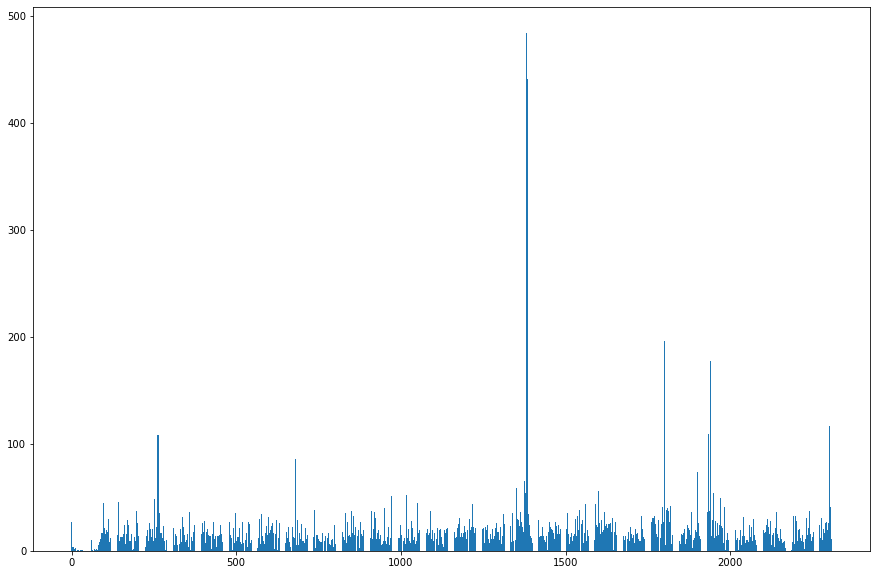

In [65]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (15, 10)

# chan = 65

plt.bar(range(len(gbm.feature_importances_)), gbm.feature_importances_)
# plt.bar(range(chan*21, (chan+1)*21), gbm.feature_importances_[chan*21:(chan+1)*21])

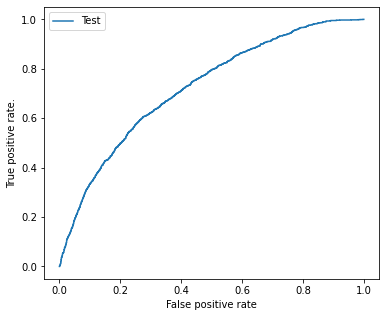

In [71]:
matplotlib.rcParams['figure.figsize'] = (6, 5)

from sklearn.metrics import roc_curve
                             
def plotROC(tpr, fpr, label=''):
    """
    Plot ROC curve from tpr and fpr.
    """
    plt.plot(fpr, tpr, label=label)
    plt.legend()
    plt.ylabel('True positive rate.')
    plt.xlabel('False positive rate')
    plt.show()
    
fpr, tpr, thresh = roc_curve(y_test > 3, gbm.predict_proba(X_test)[:, 1])

plotROC(tpr, fpr, label='Test')

In [29]:
from sklearn.metrics import roc_auc_score

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclassova',
    'is_unbalance': True,
    'metric': ['multi_logloss'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

gbm = lgb.LGBMClassifier(**hyper_params)

gbm.fit(X_train, y_cluster_train,
        eval_set=[(X_test, y_cluster_test)],
        eval_metric='multi_logloss',
        early_stopping_rounds=10)

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.123962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] fe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	valid_0's multi_logloss: 1.25323
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[21]	valid_0's multi_logloss: 1.24896
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[22]	valid_0's multi_logloss: 1.24455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[23]	valid_0's multi_logloss: 1.24012
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[46]	valid_0's multi_logloss: 1.15796
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[47]	valid_0's multi_logloss: 1.15471
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[48]	valid_0's multi_logloss: 1.15157
[LightGBM] [Warning] No further splits with positive gain, be

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[71]	valid_0's multi_logloss: 1.09128
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[72]	valid_0's multi_logloss: 1.08903
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[73]	valid_0's multi_logloss: 1.08681
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[95]	valid_0's multi_logloss: 1.0429
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[96]	valid_0's multi_logloss: 1.0411
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[97]	valid_0's multi_logloss: 1.03927
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[118]	valid_0's multi_logloss: 1.00506
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[119]	valid_0's multi_logloss: 1.00364
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[138]	valid_0's multi_logloss: 0.977306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[139]	valid_0's multi_logloss: 0.976034
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[161]	valid_0's multi_logloss: 0.951174
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[162]	valid_0's multi_logloss: 0.950149
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[182]	valid_0's multi_logloss: 0.930086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[183]	valid_0's multi_logloss: 0.929136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[184]	valid_0's mult

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[204]	valid_0's multi_logloss: 0.91226
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[205]	valid_0's multi_logloss: 0.911618
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[206]	valid_0's multi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[224]	valid_0's multi_logloss: 0.898659
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[225]	valid_0's multi_logloss: 0.898084
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[226]	valid_0's mult

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[247]	valid_0's multi_logloss: 0.88591
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[248]	valid_0's multi_logloss: 0.885384
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[249]	valid_0's multi_logloss: 0.884827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[271]	valid_0's multi_logloss: 0.874816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[272]	valid_0's multi_logloss: 0.874289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[291]	valid_0's multi_logloss: 0.865914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[292]	valid_0's multi_logloss: 0.865566
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[293]	valid_0's multi_logloss: 0.86522
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[313]	valid_0's multi_logloss: 0.858612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[314]	valid_0's multi_logloss: 0.858189
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[333]	valid_0's multi_logloss: 0.851969
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[334]	valid_0's multi_logloss: 0.851709
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[335]	valid_0's multi_logloss: 0.85148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[354]	valid_0's multi_logloss: 0.845862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[355]	valid_0's multi_logloss: 0.845569
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[356]	valid_0's multi_logloss: 0.845326
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[375]	valid_0's multi_logloss: 0.840444
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[376]	valid_0's multi_logloss: 0.840116
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[377]	valid_0's multi_logloss: 0.839849
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[397]	valid_0's multi_logloss: 0.836877
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[398]	valid_0's multi_logloss: 0.836806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[399]	valid_0's mult

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[417]	valid_0's multi_logloss: 0.833129
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[418]	valid_0's multi_logloss: 0.832859
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[419]	valid_0's multi_logloss: 0.832654
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[438]	valid_0's multi_logloss: 0.830519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[439]	valid_0's multi_logloss: 0.830408
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[458]	valid_0's multi_logloss: 0.828798
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[459]	valid_0's multi_logloss: 0.828677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[478]	valid_0's multi_logloss: 0.827326
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[479]	valid_0's multi_logloss: 0.827345
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[480]	valid_0's mult

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[499]	valid_0's multi_logloss: 0.826504
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[500]	valid_0's multi_logloss: 0.826379
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[519]	valid_0's multi_logloss: 0.825653
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[520]	valid_0's multi_logloss: 0.825653
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

LGBMClassifier(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
               is_unbalance=True, learning_rate=0.005, max_bin=512, max_depth=8,
               metric=['multi_logloss'], n_estimators=1000,
               num_iterations=100000, num_leaves=128, objective='multiclassova',
               task='train', verbose=0)

In [35]:
roc_auc_score(label_binarize(gbm.predict(X_test), classes=range(5)), \
              label_binarize(y_cluster_test, classes=range(5)))

0.5749663038280403

In [32]:
for i in range(5):
    try:
        print(i, roc_auc_score(gbm.predict(X_test) == i, y_cluster_test == i))
    except:
        print("An exception occurred")

0 0.6010201688555348
1 0.5563533003474049
2 0.5777006681277217
3 0.5923955866681533
4 0.5473617951413867


In [33]:
confusion_matrix(gbm.predict(X_test), y_cluster_test)

array([[ 440,   56,  350,  173,   21],
       [  62,   60,  119,   32,   22],
       [ 470,  268, 1147,  265,  108],
       [ 179,   37,  226,  208,    9],
       [  14,    4,   32,    9,    9]])

In [6]:
f1_score(gbm.predict(X_test), y_cluster_test, average='weighted')

0.5577052885921293

In [75]:
gbm.feature_importances_.argmax() % 21

5

In [82]:
gbm.feature_importances_.reshape(110, 21).sum(axis=0)

array([2049, 2017, 2288, 2305, 2315, 2757, 2211, 2095, 2279, 2364, 2386,
       2318, 2330, 2183, 2152, 2010, 2343, 2437, 2444, 2591, 1975])

In [85]:
gbm.feature_importances_.reshape(110, 21).max(axis=0), gbm.feature_importances_.reshape(110, 21).argmax(axis=0)

(array([ 92,  52,  69,  91, 104, 566,  83,  63, 167,  75,  89,  86,  63,
         63, 130, 120, 201, 127, 170, 555,  71], dtype=int32),
 array([ 77,  90,  55,  32,  59,  59,  26, 109,  78,  77,  54,  65,  65,
        104,  86,  65,  65,  77,  77,  65,  78]))